In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
airlines = pd.read_csv("airlines.csv")

In [22]:
airline = airlines.loc[:,"netIncome":"fleetSize"]

In [23]:
airline

,netIncome,avarageDelay,market,employee,fleetSize
0,2.6760,7.876433,16.9,113300,948
1,0.2511,8.109078,4.6,10239,313
2,0.7590,8.012633,5.5,20000,228
3,4.3730,6.638689,18.3,80000,852
4,0.2441,-0.785350,1.3,6130,51
5,2.2630,8.675944,14.5,86000,738
6,2.2000,5.333689,19.1,53536,727
7,0.0419,5.333689,0.7,7700,204
8,0.1030,5.464317,2.3,12119,389
9,0.0048,8.663733,1.2,9000,235


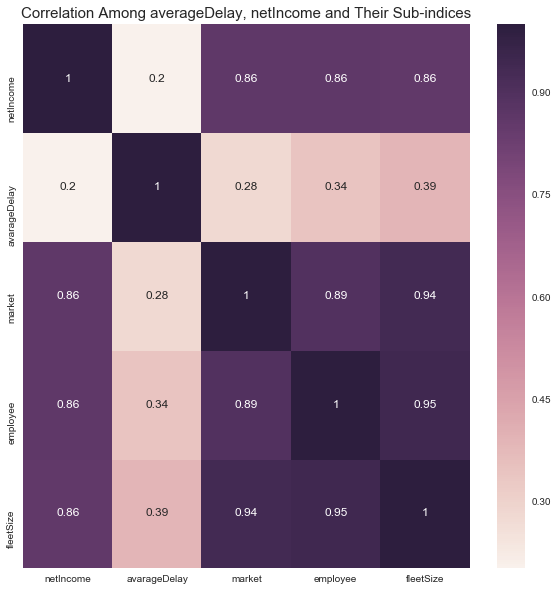

In [24]:
coAirline = airline.corr(method='pearson')

import seaborn as sns
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Among averageDelay, netIncome and Their Sub-indices', size=15)
sns.heatmap(coAirline,annot=True, annot_kws={"size":12});

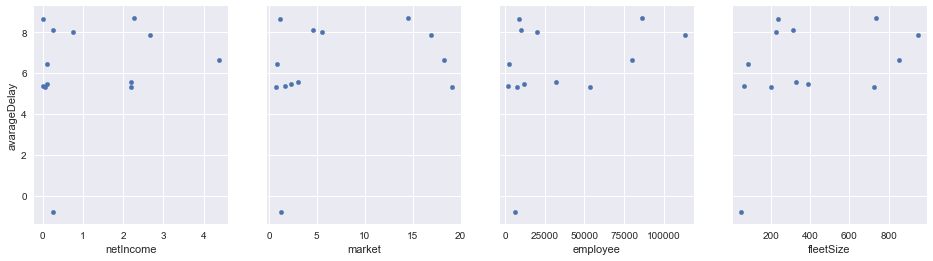

In [25]:
fig, axs = plt.subplots(1, 4, sharey=True)
airline.plot(kind='scatter', x='netIncome', y='avarageDelay', ax=axs[0], figsize=(16, 4))
airline.plot(kind='scatter', x='market', y='avarageDelay', ax=axs[1])
airline.plot(kind='scatter', x='employee', y='avarageDelay', ax=axs[2])
airline.plot(kind='scatter', x='fleetSize', y='avarageDelay', ax=axs[3])

In [26]:
import statsmodels.formula.api as smf
# create a fitted model in one line
lm1 = smf.ols(formula='avarageDelay ~ netIncome', data=airline).fit()
lm2 = smf.ols(formula='avarageDelay ~ market', data=airline).fit()
lm3 = smf.ols(formula='avarageDelay ~ employee', data=airline).fit()
lm4 = smf.ols(formula='avarageDelay ~ fleetSize', data=airline).fit()

In [27]:
netIncome_new = pd.DataFrame({'netIncome': [airline.avarageDelay.min(), airline.avarageDelay.max()]})
market_new = pd.DataFrame({'market': [airline.avarageDelay.min(), airline.avarageDelay.max()]})
employee_new = pd.DataFrame({'employee': [airline.avarageDelay.min(), airline.avarageDelay.max()]})
fleetSize_new = pd.DataFrame({'fleetSize': [airline.avarageDelay.min(), airline.avarageDelay.max()]})

preds1 = lm1.predict(netIncome_new)
preds2 = lm2.predict(market_new)
preds3 = lm3.predict(employee_new)
preds4 = lm4.predict(fleetSize_new)

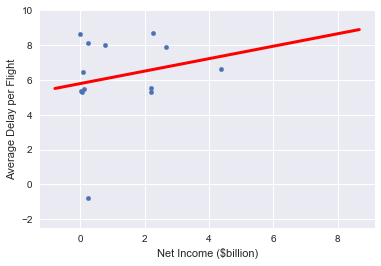

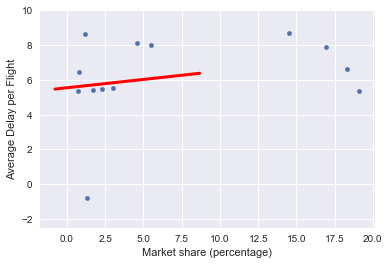

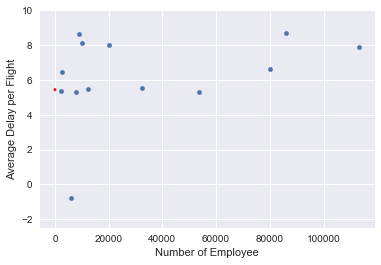

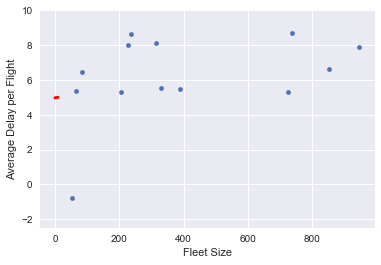

In [28]:
airline.plot(kind='scatter', x='netIncome', y='avarageDelay')
plt.xlabel('Net Income ($billion)')
plt.ylabel('Average Delay per Flight')
plt.ylim(-2.5,10)
plt.plot(netIncome_new, preds1, c='red', linewidth=3)

airline.plot(kind='scatter', x='market', y='avarageDelay')
plt.xlabel('Market share (percentage)')
plt.ylabel('Average Delay per Flight')
plt.ylim(-2.5,10)
plt.plot(market_new, preds2, c='red', linewidth=3)

airline.plot(kind='scatter', x='employee', y='avarageDelay')
plt.xlabel('Number of Employee')
plt.ylabel('Average Delay per Flight')
plt.ylim(-2.5,10)
plt.plot(employee_new, preds3, c='red', linewidth=3)

airline.plot(kind='scatter', x='fleetSize', y='avarageDelay')
plt.xlabel('Fleet Size')
plt.ylabel('Average Delay per Flight')
plt.ylim(-2.5,10)
plt.plot(fleetSize_new, preds4, c='red', linewidth=3)